In [4]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.animation as mpl_animation
import matplotlib
from IPython.display import HTML

# Perceptrón base

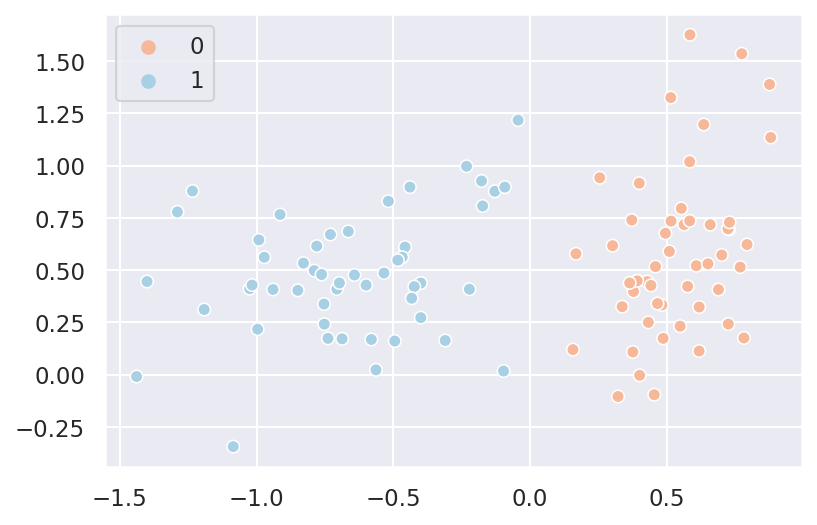

In [36]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.55)

plt.figure(dpi=150)
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu')
plt.show()

In [37]:
epoch = 1

b = 0.0
w = np.zeros(2).T

while True:
    stable = True
    print(f"epoch {epoch}")
    for (Xi, yi) in zip(X, y):
        yhat = max(0.0, np.sign(np.dot(Xi, w) + b))
        
        w += (yi - yhat)*Xi
        b += (yi - yhat)
        stable &= (yi == yhat)

    if stable:
        break

    epoch += 1

epoch 1
epoch 2


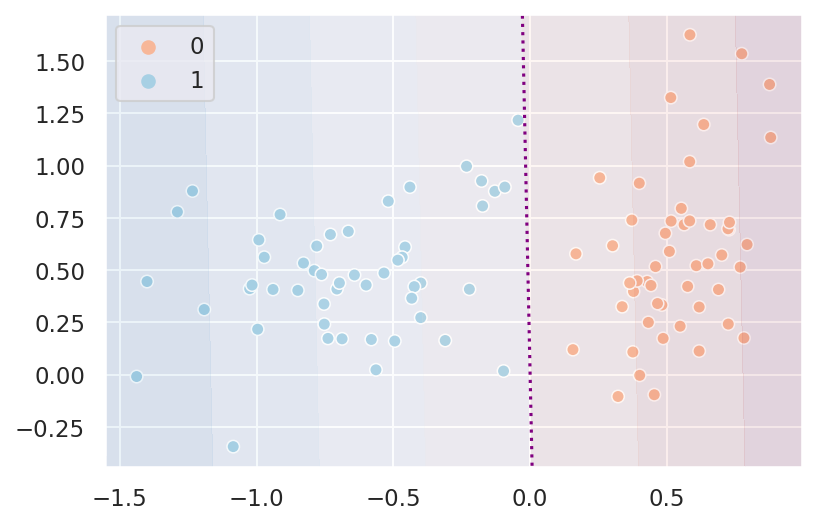

In [38]:
def plot_hiperplane(w, b, X, y):
    plt.figure(dpi=150)
    ax = sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu', alpha=1)

    G = 500

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, G), np.linspace(*ylim, G))
    z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    z = z.reshape(xx.shape)

    ax.contourf(xx, yy, z, alpha=.1, cmap='RdBu')

    x_vals = np.array(xlim)
    y_vals = b - (w[0] / w[1]) * x_vals
    plt.plot(x_vals, y_vals, ':', color='Purple')

    plt.ylim(*ylim)
    plt.xlim(*xlim)

    plt.show()

plot_hiperplane(w, b, X, y)

Que pasa si no es linealmente separable?

# Learning rate

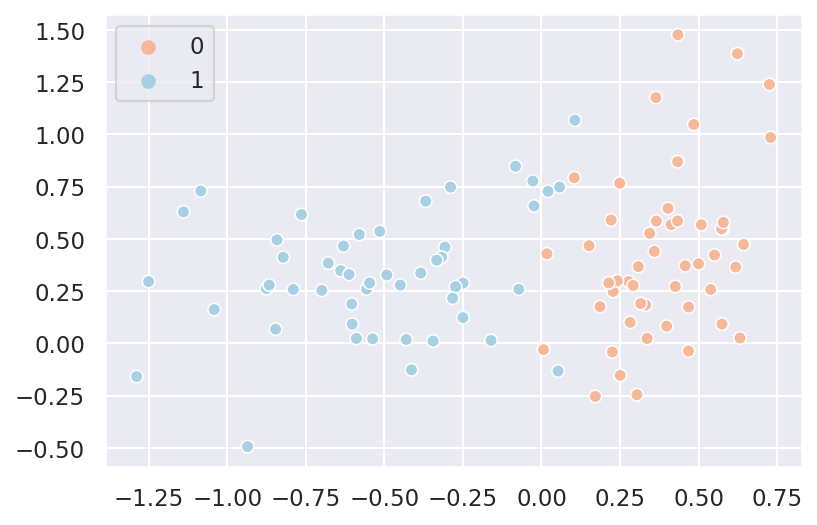

In [54]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=0.4, n_samples=100)

plt.figure(dpi=150)
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu')
plt.show()

/home/nox/repos/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


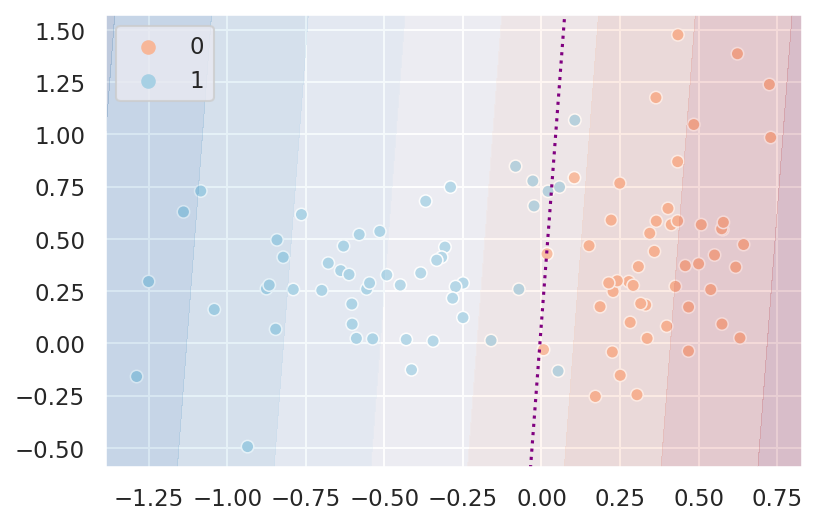

In [55]:
fig = plt.figure(dpi=150)

def plot_hiperplane(frame):
    plt.clf()
    
    epoch, b, w = frame
    #print(f"epoch: {epoch} | bias = {b} weights={w}")

    ax = sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu', alpha=1)
    
    G = 500

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, G), np.linspace(*ylim, G))
    z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    z = z.reshape(xx.shape)

    ax.contourf(xx, yy, z, alpha=.2, cmap='RdBu')

    x_vals = np.array(xlim)
    y_vals = b - (w[0] / w[1]) * x_vals
    plt.plot(x_vals, y_vals, ':', color='Purple')

    plt.ylim(*ylim)
    plt.xlim(*xlim)
    
    return (ax,)

max_epochs = 50

epoch = 1

alpha = 0.1
b = 0.0
w = np.zeros(2).T

frames=[(epoch, np.copy(b), np.copy(w))]

while True:
    if epoch > max_epochs:
        break
    stable = True
    for (Xi, yi) in zip(X, y):
        yhat = max(0.0, np.sign(np.dot(Xi, w) + b))
        
        w += (yi - yhat)*Xi*alpha
        b += (yi - yhat)*alpha
        stable &= (yi == yhat)

    if stable:
        break

    epoch += 1
    frames.append((epoch, np.copy(b), np.copy(w)))

def init_anim():
    last_frame = frames[-1]
    plot_hiperplane(last_frame)
    
anim = mpl_animation.FuncAnimation(fig, plot_hiperplane, frames=frames, interval=250, init_func=init_anim)

matplotlib.rc('animation', html='jshtml')

HTML(anim.to_jshtml())

# Funciones de activacion

Que funciones de activacion podemos usar? Cuales son las propiedades que deben cumplir?

## Identidad

La función identidad está dada por $$f(x) = x$$

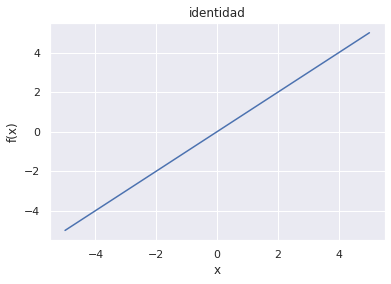

In [43]:
x = np.linspace(-5, 5)
y = x

plt.figure()
sns.lineplot(x, y)
plt.title("identidad")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

## Escalón

La función escalón está dada por $$f(x)= \left\{ \begin{array}{lcc}
             0 &   si  & x \lt 0 \\
             \\ 1 &  si & x \geq 0
             \end{array}
   \right. $$

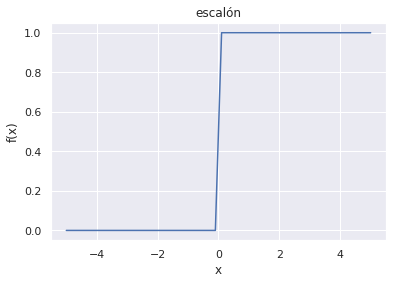

In [48]:
x = np.linspace(-5, 5)
y = np.maximum(0.0, np.sign(x))

plt.figure()
sns.lineplot(x, y)
plt.title("escalón")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

## Tangente hiperbólica

La función tangente hiperbólica está dada por $$f(x) = \tanh{x}$$

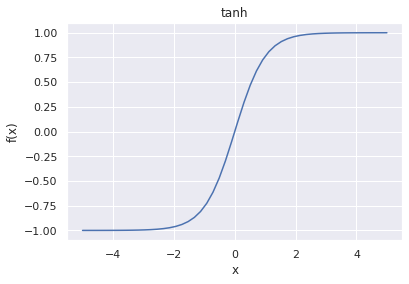

In [51]:
x = np.linspace(-5, 5)
y = np.tanh(x)

plt.figure()
sns.lineplot(x, y)
plt.title("tanh")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

## ReLU (Rectified Linear Unit)

La función Relu viene dada por $$f(x) = \max(0, x) = \left\{ \begin{array}{lcc}
             0 &   si  & x \lt 0 \\
             \\ x &  si & x \geq 0
             \end{array}
   \right. $$

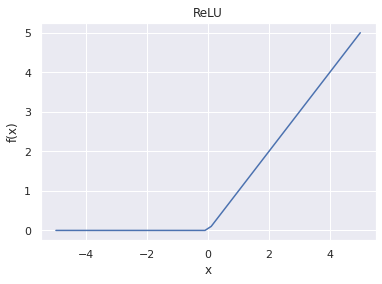

In [52]:
x = np.linspace(-5, 5)
y = np.maximum(0, x)

plt.figure()
sns.lineplot(x, y)
plt.title("ReLU")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

# Perceptrón multicapa

Vamos a ver un ejemplo cuado el dataset no es linealmente separable.

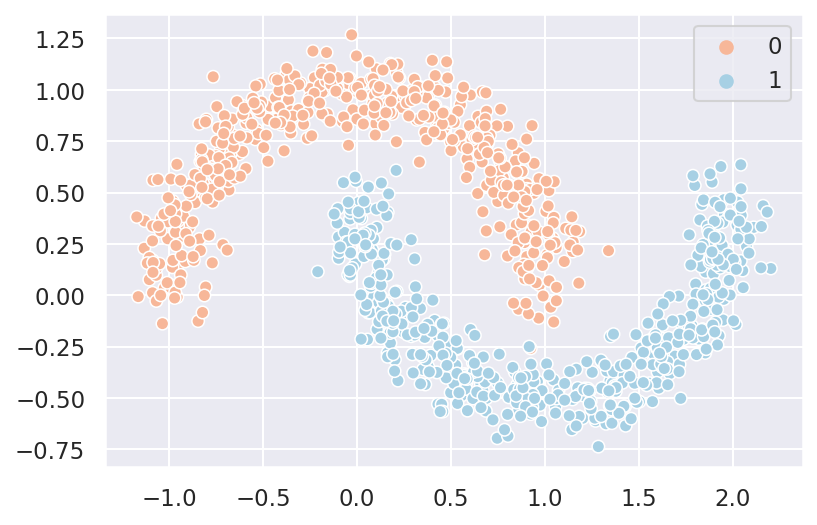

In [142]:
X, y = make_moons(n_samples=1000, random_state=0, noise=0.1)

plt.figure(dpi=150)
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu')
plt.show()

In [160]:
import keras

in_l = keras.layers.Input(shape=(2,))
d1 = keras.layers.Dense(128, activation='relu')(in_l)
out_l = keras.layers.Dense(1, activation='sigmoid')(d1)

m = keras.models.Model(inputs=[in_l], outputs=[out_l])

m.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

m.fit(X, y, epochs=1000, batch_size=64, verbose=0)

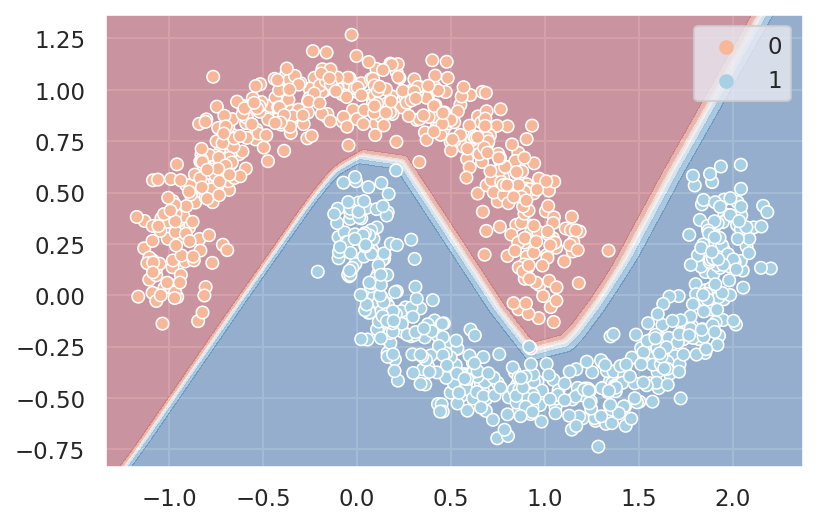

In [161]:
plt.figure(dpi=150)

xrange = X[:,0].max() - X[:,0].min()
yrange = X[:,1].max() - X[:,1].min()

xlim = (X[:,0].min() - xrange*0.05, X[:,0].max() + xrange*0.05)
ylim = (X[:,1].min() - yrange*0.05, X[:,1].max() + yrange*0.05)

G = 250

xx, yy = np.meshgrid(np.linspace(*xlim, G), np.linspace(*ylim, G))
z = m.predict(np.c_[xx.ravel(), yy.ravel()])[:,0]
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=.4, cmap='RdBu')
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='RdBu', alpha=1)

plt.show()

# Funciones de pérdida

# SGD?

# Perceptrón multiclase